#PRACTICA FINAL DE MARIA BLANCO, CARLOS DANIEL GARCIA LAVANGA Y PABLO SOLER 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('once')
from time import sleep
from random import shuffle
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KDTree

#from hdbscan import HDBSCAN
from matplotlib.colors import ListedColormap
from matplotlib import cm
import matplotlib.ticker as ticker
from IPython import display

In [ ]:
#Cargamos los datos desde google drive y procedemos a limpiar los datos para comenzar a trabajar
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/NCDB_1999_to_2014.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Primero tratamos los datos y los limpiamos para proceder al trabajo propuesto.

In [ ]:
Data

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,UU,U,UU,2,UU,UU,01,U,U,...,13,07,UUUU,01,M,24,11,1,NN,1
5860401,2014,UU,U,23,2,01,06,05,1,1,...,1,14,2006,01,M,29,96,2,09,5
5860402,2014,UU,U,14,2,01,02,01,1,5,...,1,01,2006,01,F,UU,11,2,01,1
5860403,2014,UU,U,22,1,01,06,01,2,4,...,1,22,UUUU,01,M,67,12,3,01,U


In [ ]:
Data.columns

Index(['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR', 'P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE',
       'P_USER'],
      dtype='object')

In [ ]:
Data_limpio = Data.replace(["UU", "U", "nan", "X", "XX","UUUU","XXXX","NN","NNNN","N","Q","QQ","QQQQ"], None)
Data_limpio

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,02,1
4,1999,1,1,08,2,01,01,UU,5,3,...,99,01,1986,01,M,05,99,2,02,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,12,7,19,2,01,03,01,1,3,...,13,07,2000,01,M,24,11,1,02,1
5860401,2014,12,7,23,2,01,06,05,1,1,...,1,14,2006,01,M,29,96,2,09,5
5860402,2014,12,7,14,2,01,02,01,1,5,...,1,01,2006,01,F,29,11,2,01,1
5860403,2014,12,7,22,1,01,06,01,2,4,...,1,22,2006,01,M,67,12,3,01,1


In [ ]:
type(Data_limpio.at[0,"C_RCFG"])

str

Cambiamos las variables que no conocemos por valores NaN. Incluimos en esta sustitución las variables Q dado que al ser la opción "otros" no conocemos tampoco los valores.

In [ ]:
Data_limpio = Data_limpio.replace({"1": 1, "01": 1, "2":2, '02': 2, "3": 3, "03":3, "4":4, "04":4, "5":5, "05":5, "6": 6, "06":6,
                            "7":7,"07":7, "8":8, "08":8, "9":9, "09":9, "UU":None})

Procedemos a dropear los NaN ya que nos impiden utilizar la función to_numeric y, además, las filas con valores missing tampoco darán información representativa y concreta.

In [ ]:
Data_na= Data_limpio.dropna()
Data_na

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
46,1999,1,1,15,2,1,3,1,1,1,...,1,1,1995,1,M,17,11,1,2,1
47,1999,1,1,15,2,1,3,1,1,1,...,99,1,1995,2,F,41,99,2,2,3
48,1999,1,1,23,2,1,2,1,1,5,...,1,1,1997,1,M,25,11,2,2,1
49,1999,1,1,23,2,1,2,1,1,5,...,1,1,1997,2,M,25,13,2,2,2
50,1999,1,1,23,1,1,4,1,1,1,...,1,6,1997,1,M,44,11,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,12,7,19,2,1,3,1,1,3,...,13,7,2000,1,M,24,11,1,2,1
5860401,2014,12,7,23,2,1,6,5,1,1,...,1,14,2006,1,M,29,96,2,9,5
5860402,2014,12,7,14,2,1,2,1,1,5,...,1,1,2006,1,F,29,11,2,1,1
5860403,2014,12,7,22,1,1,6,1,2,4,...,1,22,2006,1,M,67,12,3,1,1


In [ ]:
Data_na.columns

Index(['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR', 'P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE',
       'P_USER'],
      dtype='object')

A continuación, convertiremos todas las variables object a numéricas con la función to_numeric. Con ello, conseguiremos que identifique de manera correcta algunas variables que aún siendo números, las identifica como object por las comillas. También convertiremos la variable C_VEHS en integer ya que al pasarla a número la convierte en una función float.

In [ ]:
Data_na['C_MNTH'] = pd.to_numeric(Data_na['C_MNTH'])
Data_na['C_WDAY'] = pd.to_numeric(Data_na['C_WDAY'])
Data_na['C_HOUR'] = pd.to_numeric(Data_na['C_HOUR'])
Data_na['C_SEV'] = pd.to_numeric(Data_na['C_SEV'])
Data_na['C_VEHS'] = pd.to_numeric(Data_na['C_VEHS'], downcast='integer')
Data_na['C_CONF'] = pd.to_numeric(Data_na['C_CONF'])

Data_na['C_RCFG'] = pd.to_numeric(Data_na['C_RCFG'])
Data_na['C_WTHR'] = pd.to_numeric(Data_na['C_WTHR'])
Data_na['C_RSUR'] = pd.to_numeric(Data_na['C_RSUR'])
Data_na['C_RALN'] = pd.to_numeric(Data_na['C_RALN'])
Data_na['C_TRAF'] = pd.to_numeric(Data_na['C_TRAF'])
Data_na['V_ID'] = pd.to_numeric(Data_na['V_ID'])

Data_na['V_TYPE'] = pd.to_numeric(Data_na['V_TYPE'])
Data_na['V_YEAR'] = pd.to_numeric(Data_na['V_YEAR'])
Data_na['P_ID'] = pd.to_numeric(Data_na['P_ID'])
Data_na['P_AGE'] = pd.to_numeric(Data_na['P_AGE'])
Data_na['P_PSN'] = pd.to_numeric(Data_na['P_PSN'])
Data_na['P_ISEV'] = pd.to_numeric(Data_na['P_ISEV'])

Data_na['P_SAFE'] = pd.to_numeric(Data_na['P_SAFE'])
Data_na['P_USER'] = pd.to_numeric(Data_na['P_USER'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Data_na['C_VEHS']

46         1
47         1
48         1
49         1
50         1
          ..
5860400    1
5860401    1
5860402    1
5860403    1
5860404    1
Name: C_VEHS, Length: 5860356, dtype: int8

Como podemos observar, después de la modificación to_numeric hemos conseguido que identifique todos los números como number por lo que solo nos queda como variable object el sexo. Más tarde trataremos esta variable para convertirla de categórica object a numérica.

In [ ]:
Data_na.dtypes

C_YEAR     int64
C_MNTH     int64
C_WDAY     int64
C_HOUR     int64
C_SEV      int64
C_VEHS      int8
C_CONF     int64
C_RCFG     int64
C_WTHR     int64
C_RSUR     int64
C_RALN     int64
C_TRAF     int64
V_ID       int64
V_TYPE     int64
V_YEAR     int64
P_ID       int64
P_SEX     object
P_AGE      int64
P_PSN      int64
P_ISEV     int64
P_SAFE     int64
P_USER     int64
dtype: object

Valores missing

In [ ]:
Data_na['P_SEX']

46         M
47         F
48         M
49         M
50         M
          ..
5860400    M
5860401    M
5860402    F
5860403    M
5860404    M
Name: P_SEX, Length: 5860356, dtype: object

In [ ]:
from sklearn import preprocessing
Data_na_cont=Data_na
Data_na_cont['P_SEX'] = Data_na_cont['P_SEX'].map({'M': 1, 'F': 0}).astype(int)
Data_na_cont

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
46,1999,1,1,15,2,1,3,1,1,1,...,1,1,1995,1,1,17,11,1,2,1
47,1999,1,1,15,2,1,3,1,1,1,...,99,1,1995,2,0,41,99,2,2,3
48,1999,1,1,23,2,1,2,1,1,5,...,1,1,1997,1,1,25,11,2,2,1
49,1999,1,1,23,2,1,2,1,1,5,...,1,1,1997,2,1,25,13,2,2,2
50,1999,1,1,23,1,1,4,1,1,1,...,1,6,1997,1,1,44,11,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,12,7,19,2,1,3,1,1,3,...,13,7,2000,1,1,24,11,1,2,1
5860401,2014,12,7,23,2,1,6,5,1,1,...,1,14,2006,1,1,29,96,2,9,5
5860402,2014,12,7,14,2,1,2,1,1,5,...,1,1,2006,1,0,29,11,2,1,1
5860403,2014,12,7,22,1,1,6,1,2,4,...,1,22,2006,1,1,67,12,3,1,1


In [ ]:
Data_na_cont['C_SEV'] = Data_na_cont['C_SEV'].map({2: 1, 1: 0}).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Pasamos P_sex a numérica poniendo los hombres como 1 y las mujeres como 0 

#Analizamos la variable objetivo y la distribucion de sus valores 

In [ ]:
Data_status = Data_na_cont['C_SEV']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

Data_sev_conteo = Data_na_cont['C_SEV'].value_counts().reset_index()
Data_sev = pd.merge(Data_status, Data_sev_conteo, on=['index'], how='inner')
Data_sev

,index,percent,C_SEV
0,1,98.316945,5761723
1,0,1.683055,98633


In [ ]:
Data_status = px.histogram(Data_sev, x="index", y=['percent'])
Data_status.show()

Gráfico de la distribución de los valores que componen la variable objetivo.

In [ ]:
lista_continuous = Data_na_cont.select_dtypes(include = np.number).columns
lista_continuous

Index(['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR', 'P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE',
       'P_USER'],
      dtype='object')

In [ ]:
corrMatrix = Data_na_cont[lista_continuous].corr()
corrMatrix.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
C_YEAR,1.00,-0.00,-0.01,-0.01,0.01,0.00,-0.01,-0.01,0.00,0.02,-0.00,-0.02,0.02,0.00,0.63,-0.00,-0.02,0.06,0.02,0.00,0.02,0.01
C_MNTH,-0.00,1.00,0.00,0.02,-0.01,-0.02,-0.01,-0.00,-0.03,-0.10,-0.00,0.00,0.01,0.01,0.03,-0.00,0.00,0.01,0.01,0.00,0.01,0.02
C_WDAY,-0.01,0.00,1.00,-0.01,-0.02,-0.02,-0.03,-0.02,0.01,-0.00,0.03,0.03,-0.02,-0.02,-0.01,0.05,0.01,-0.05,-0.00,0.00,-0.01,0.04
C_HOUR,-0.01,0.02,-0.01,1.00,0.02,0.02,0.06,0.02,-0.02,-0.05,-0.03,-0.03,0.01,0.01,-0.01,0.01,-0.03,-0.02,0.01,-0.04,0.01,0.05
C_SEV,0.01,-0.01,-0.02,0.02,1.00,-0.02,0.02,0.03,-0.02,-0.01,-0.05,-0.06,-0.02,-0.03,0.01,-0.03,-0.03,-0.01,-0.03,-0.16,-0.01,-0.02
C_VEHS,0.00,-0.02,-0.02,0.02,-0.02,1.00,0.25,0.01,0.03,-0.02,-0.07,-0.03,-0.11,-0.04,0.03,0.01,0.00,0.03,-0.14,-0.11,-0.06,-0.10
C_CONF,-0.01,-0.01,-0.03,0.06,0.02,0.25,1.00,0.19,-0.06,-0.10,-0.15,-0.29,-0.21,0.01,-0.01,-0.00,-0.02,0.05,-0.20,-0.11,-0.06,-0.08
C_RCFG,-0.01,-0.00,-0.02,0.02,0.03,0.01,0.19,1.00,-0.04,-0.05,-0.05,-0.25,0.01,0.01,-0.01,-0.01,-0.02,0.03,-0.00,-0.04,0.03,0.00
C_WTHR,0.00,-0.03,0.01,-0.02,-0.02,0.03,-0.06,-0.04,1.00,0.46,0.08,0.07,-0.01,-0.04,0.00,0.01,-0.00,-0.01,-0.02,0.03,-0.04,-0.05
C_RSUR,0.02,-0.10,-0.00,-0.05,-0.01,-0.02,-0.10,-0.05,0.46,1.00,0.11,0.10,-0.02,-0.04,0.01,0.01,-0.02,-0.02,-0.03,0.05,-0.02,-0.07


Tenemos aquí la matriz de correlación. Podemos observar que la superficie de la carretera y las condiciones climáticas o que la matricula del coche y la posicion de la persona están muy correlacionadas.

# 2. ¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son más propensos a tener accidentes (acción correctiva en prima)?

In [ ]:
Data_Vtypes = Data_na_cont.groupby(['V_TYPE']).size().reset_index(name='Conteo de tipos vehiculo accidentes')
Data_Vtypes = Data_Vtypes.sort_values(['Conteo de tipos vehiculo accidentes'], ascending=[False])
Data_Vtypes

,V_TYPE,Conteo de tipos vehiculo accidentes
0,1,5075345
2,6,184524
10,17,126495
8,14,126377
3,7,92733
4,8,72888
1,5,70500
7,11,55586
5,9,21720
9,16,10293


El tipo de vehiculo que más accidentes tiene es el tipo 1(Vehículos ligeros) seguido del tipo 6(Furgonetas dedicadas a transportar bienes) con una diferencia de 4.890.821 entre ellos.

In [ ]:
Data_Vyear = Data_na_cont.groupby(['V_YEAR']).size().reset_index(name='Conteo de antiguedad accidentes')
Data_Vyear = Data_Vyear.sort_values(['Conteo de antiguedad accidentes'], ascending=[False])
Data_Vyear[1:20]

,V_YEAR,Conteo de antiguedad accidentes
96,1998,324449
100,2002,322904
97,1999,315591
101,2003,308165
99,2001,306893
95,1997,288982
103,2005,251676
102,2004,249272
93,1995,247649
94,1996,218774


Los vehículos en los que más accidentes ocurren son los vehículos que datan desde el 1980 al 2000. Los vehículos fabricados de los 2000 en adelante bajan la tasa de accidentes exponencialmente hasta el 2014. Podemos pensar que antes de los 80 habría más accidentes pero no tenemos datos para comprobarlo.


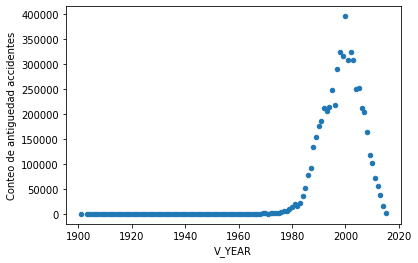

In [ ]:
plot_YEAR = Data_Vyear.plot("V_YEAR", "Conteo de antiguedad accidentes", kind="scatter")
plt.show()

Ahora pasaremos a analizar las variables que afectan al conductor. Para ello analizaremos el sexo del conductor(P_SEX), la edad del conductor(P_AGE) y el dispositivo de seguridad utilizado(P_SAFE)

In [ ]:
#Primeramente estudiaremos la variable P_SEX en la que 1 son hombres y 0 mujeres.
Data_sex = Data_na_cont.groupby(['P_SEX']).size().reset_index(name='Conteo de hombres y mujeres')
Data_sex = Data_sex.sort_values(['Conteo de hombres y mujeres'], ascending=[False])
Data_sex

,P_SEX,Conteo de hombres y mujeres
1,1,3299532
0,0,2560824


Como podemos observar en la tabla de arriba, los hombres por lo general tienden a tener más accidentes que las mujeres. Hay una diferencia de casi 1.000.000 de accidentes entre ellos. Estos datos los podemos achacar a que por lo general hay más hombres con carnet que mujeres y a que las mujeres suelen ser más precavidas.

In [ ]:
#A continuación analizaremos los datos de las edades de los conductores con más accidentes
Data_age = Data_na_cont.groupby(['P_AGE']).size().reset_index(name='Conteo de edades')
Data_age = Data_age.sort_values(['Conteo de edades'], ascending=[False])
Data_age

,P_AGE,Conteo de edades
17,18,183489
18,19,179280
19,20,169830
16,17,169003
20,21,158539
...,...,...
98,99,337
94,95,321
97,98,220
95,96,218


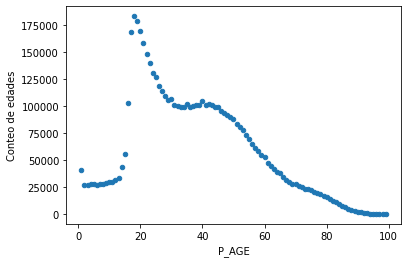

In [ ]:
#Ahora procedemos a graficar los datos de Data_age para poder analizarlos:
plot_age = Data_age.plot("P_AGE", "Conteo de edades", kind="scatter")
plt.show()

Como podemos observar en el gráfico las edades en las que más accidentes suelen ocurrir son entre los 20 y los 30 años. Este último dato lo podemos asociar a la temprana edad de los conductores y a su poca experiencia en la conducción.

In [ ]:
#Por último analizaremos en que casos los conductores llevaban un dispositivo de seguridad como el cinturón
Data_safe = Data_na_cont.groupby(['P_SAFE']).size().reset_index(name='Conteo de seguridad')
Data_safe = Data_safe.sort_values(['Conteo de seguridad'], ascending=[False])
Data_safe

,P_SAFE,Conteo de seguridad
1,2,5232360
0,1,269736
6,13,193161
2,9,131842
5,12,33089
3,10,153
4,11,15


Como podemos observar, los conductores que llevaban algún tipo de dispositivo de seguridad son los más propensos a tener accidentes. En segundo puesto con más de 5.000.000 de accidentes de diferencia tenemos a los conductores sin cinturón.

# 3.¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son menos propensos a tener accidentes (descuento en prima)?

In [ ]:
#Procedemos a realizar las mismas funciones que en el ejercicio 2 pero en modalidad descendente para sacar primero los coches/conductores
#que menos accidentes tienen.
Data_Vtypes2 = Data_na_cont.groupby(['V_TYPE']).size().reset_index(name='Conteo de tipos vehiculo accidentes')
Data_Vtypes2 = Data_Vtypes2.sort_values(['Conteo de tipos vehiculo accidentes'], ascending=[True])
Data_Vtypes2

,V_TYPE,Conteo de tipos vehiculo accidentes
14,21,860
6,10,949
12,19,2067
11,18,3267
16,23,3422
15,22,4955
13,20,8375
9,16,10293
5,9,21720
7,11,55586


Como podemos observar en la tabla de arriba los vehículos con menos accidentes son los de tipo 21(Fire engine) seguidos del tipo 10(autobuses de colegio) y del 19(vehículos de granja).

In [ ]:
Data_Vyear2 = Data_na_cont.groupby(['V_YEAR']).size().reset_index(name='Conteo de antiguedad accidentes')
Data_Vyear2 = Data_Vyear2.sort_values(['Conteo de antiguedad accidentes'], ascending=[True])
Data_Vyear2[30:80]

,V_YEAR,Conteo de antiguedad accidentes
20,1922,17
33,1935,17
35,1937,18
24,1926,21
17,1919,21
43,1945,22
26,1928,23
38,1940,25
44,1946,27
29,1931,31


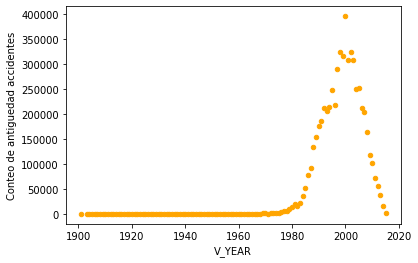

In [ ]:
#Ahora procedemos a graficar los datos de Data_age para poder analizarlos:
plot_Vyear2 = Data_Vyear2.plot("V_YEAR", "Conteo de antiguedad accidentes", kind="scatter",color="orange")
plt.show()

Como podemos observar en la gráfica de más arriba los coches fabricados entre 1900 y el 1960 no indican ningún accidente. Esto último lo acahacamos a que probablemente no se contabilizaban accidentes hasta más o menos los años 60 donde ya empiezan a ser más representativos. Hemos sacado los datos desde diferentes rangos para poder ver cuando empiezan a contabilizar los accidentes. Analizando la gráfica en conjunto y teniendo en cuenta lo comentado anteriormente, podemos asegurar que los vehículos con menos accidentes reales son los que datan desde el 2000 al 2014. Esto último lo podemos achacar a las nuevas tecnologías que van integradas en los vehículos actuales como los sistemas de frenado automáticos además de una mayor regulación.

In [ ]:
#Después de estudiar los años de los vehículos que menos accidentes tienen pasaremos a comprobar que sexo es el que menos accidentes tiene
#1 son hombres y 0 mujeres.
Data_sex2 = Data_na_cont.groupby(['P_SEX']).size().reset_index(name='Conteo de hombres y mujeres')
Data_sex2 = Data_sex2.sort_values(['Conteo de hombres y mujeres'], ascending=[True])
Data_sex2

,P_SEX,Conteo de hombres y mujeres
0,0,2560824
1,1,3299532


En el sexo como hemos podido comprobar anteriormente las mujeres son a las que menos accidentes les ocurren.

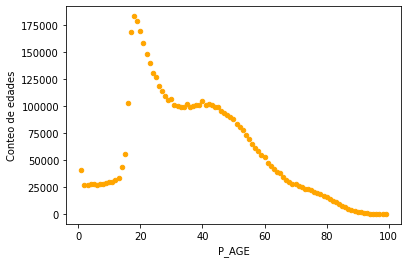

In [ ]:
#Seguido del sexo vamos a comprobar entre que edades hay menos accidentes. Podríamos hacerlo otra vez con el código en P_AGE con ascending=True,
#pero al ya tener el plot más arriba hecho vamos a proceder a sacarlo y a analizarlo.
plot_age = Data_age.plot("P_AGE", "Conteo de edades", kind="scatter",color="orange")
plt.show()

Como podemos observar en la gráfica del ejercicio anterior las edades en las que menos accidentes ocurren son las comprendidas entre los 80 años y los 100 años. Esto lo podemos relacionar con el hecho de que las personas por lo general, a partir de los 80 años o incluso antes, dejan de conducir por problemas de visión o simplemente por miedo.

In [ ]:
#Por último analizaremos en que casos los conductores llevaban un dispositivo de seguridad como el cinturón
Data_safe2 = Data_na_cont.groupby(['P_SAFE']).size().reset_index(name='Conteo de seguridad')
Data_safe2 = Data_safe2.sort_values(['Conteo de seguridad'], ascending=[True])
Data_safe2

,P_SAFE,Conteo de seguridad
4,11,15
3,10,153
5,12,33089
2,9,131842
6,13,193161
0,1,269736
1,2,5232360


Como podemos comprobar, los elementos de seguridad presentes en los individuos y vehículos con menos accidentes son el tipoo 11(Cinturón y chaleco reflectante) y el tipo 10(Vestimenta reflectante). De este último estudio podemos concluir que los conductores con vestimenta/vehículos llamativos son los que menos accidentes tienen ya que obtienen más visibilidad en carretera.

# 4.¿Qué es lo que más contribuye a que existan fallecimientos en un accidente?

In [ ]:
Data_na_cont
data_crosstab = pd.crosstab([Data_na_cont.C_HOUR, Data_na_cont.C_VEHS, Data_na_cont.C_WTHR, Data_na_cont.V_TYPE, Data_na_cont.V_YEAR, Data_na_cont.P_SEX],
							Data_na_cont.C_SEV, margins = False)
data_crosstab

C_SEV                                     0  1
C_HOUR C_VEHS C_WTHR V_TYPE V_YEAR P_SEX      
0      1      1      1      1905   1      0  3
                            1935   1      0  2
                            1949   1      0  1
                            1960   1      0  1
                            1965   1      0  2
...                                      .. ..
23     38     4      1      2005   0      0  1
                                   1      0  2
                            2006   0      0  2
                                   1      0  6
                     7      2005   1      0  1

[168975 rows x 2 columns]

Esto es una tabla de contigencias con todas las variables que nos han parecido relevantes por un lado y, por el otro, si el accidente (C_SEV) ha derivado en fallecimiento(0) o no(1).

Al no ser muy clara por estar todas juntas, procedemos a separarlas individualmente.

In [ ]:
Data_na_cont
data_crosstab = pd.crosstab([Data_na_cont.C_HOUR],
							Data_na_cont.C_SEV, margins = False)
data_crosstab

C_SEV,0,1
C_HOUR,,
0,3000,86451
1,3010,71335
2,3186,75374
3,2633,62304
4,1727,38626
5,1914,43677
6,2618,104758
7,3380,206851
8,3651,302466


Podemos observar que en Canadá, el meyor número de accidentes con fallecimiento se producen en las horas después de comer (después de las 12h), entre las 14h y las 18h alcanzando su máximo hacia las 16h. Cabe destacar que entre las 0h y las 2h el número aumenta probablemente por sueño de los conductores. 

In [ ]:
Data_na_cont
data_crosstab = pd.crosstab([Data_na_cont.C_VEHS],
							Data_na_cont.C_SEV, margins = False)
data_crosstab

C_SEV,0,1
C_VEHS,,
1,35737,1212931
2,47059,3565617
3,9907,729594
4,3077,179962
5,993,43084
6,527,13862
7,253,5428
8,127,2543
9,57,1776


Gracias a esta tabla de contingencias vemos que un 3% de los accidentes con un sólo vehículo acaban en fallecimiento mientras que sólo un 1,3% de los accidentes con dos vehículos implicados termina en tragedia. 

In [ ]:
Data_na_cont
data_crosstab = pd.crosstab([Data_na_cont.C_WTHR],
							Data_na_cont.C_SEV, margins = False)
data_crosstab

C_SEV,0,1
C_WTHR,,
1,65794,4086457
2,12661,596178
3,8326,598619
4,6977,355083
5,822,29986
6,3468,80371
7,585,15029


Esta tabla de contingencia muestras los accidentes que hayan acabado en fallecimiento o no con respecto al tiempo que hacía. Vemos que la mayoría de los accdientes se producen cuando el día es soleado pero solo hay un 1.6% de tasa de mortalidad en los accidentes. Por contra, cuando los accidentes son en condiciones de visibilidad limitada (6), la tasa de mortalidad aumenta a más de 4%.

In [ ]:
Data_na_cont
data_crosstab = pd.crosstab([Data_na_cont.V_TYPE],
							Data_na_cont.C_SEV, margins = False)
data_crosstab

C_SEV,0,1
V_TYPE,,
1,74492,5000853
5,1260,69240
6,4654,179870
7,3689,89044
8,5525,67363
9,730,20990
10,2,947
11,1593,53993
14,3830,122547


Podemos observar que en Canadá, el meyor número de accidentes se producen, obviamente, en vehículos particulares. Cabe destacar que la mayor tasa de mortandad en accidentes se produce cuando el involucrado es un camión. 

In [ ]:
Data_na_cont
data_crosstab = pd.crosstab([Data_na_cont.V_YEAR],
							Data_na_cont.C_SEV, margins = False)
data_crosstab

C_SEV,0,1
V_YEAR,,
1901,0,15
1903,0,10
1904,0,3
1905,0,3
1906,0,1
...,...,...
2011,1150,70058
2012,814,55598
2013,470,38108


Esta tabla nos permite estudiar los accidentes que ha habido según el año de construcción del coche. Como es lógico, cuanto más reciente es el coche menos accidentes y tasa de fallecimiento hay debido a la seguridad que se les incorpora.

In [ ]:
Data_na_cont
data_crosstab = pd.crosstab([Data_na_cont.P_SEX],
							Data_na_cont.C_SEV, margins = False)
data_crosstab

C_SEV,0,1
P_SEX,,
0,31675,2529149
1,66958,3232574


Observamos que el sexo influye tanto en el número de accidentes como en la tasa de mortalidad. Mientras que las mujeres tiene un 1.25% de probabilidades de estar en un accidente con fallecidos, los hombres aumentan esta tasa al 2%.

# 5. Dado un accidente, ¿se puede generar un modelo que prediga si habrá fallecimientos o no? ¿Si se va a necesitar tratamiento médico o no? Las aseguradoras tienen que inmovilizar capital para pagar estas casuísticas. 6.Libertad para generar análisis de valor y nuevas ideas. Se debe atacar mínimo un modelo (estimar si habrá fallecidos o no). Hecho esto, se puede plantear de forma opcional otros alcances (libertad para plantear opciones). 

In [ ]:
#Ahora teniendo solo los datos con accidentes mortales podemos realizar una tabla de contingencias para ver cuales son las
#variables más representativas a la hora de que existan víctimas mortales en un accidente.

In [ ]:
Data_na_cont[0:20]

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
46,1999,1,1,15,1,1,3,1,1,1,...,1,1,1995,1,1,17,11,1,2,1
47,1999,1,1,15,1,1,3,1,1,1,...,99,1,1995,2,0,41,99,2,2,3
48,1999,1,1,23,1,1,2,1,1,5,...,1,1,1997,1,1,25,11,2,2,1
49,1999,1,1,23,1,1,2,1,1,5,...,1,1,1997,2,1,25,13,2,2,2
50,1999,1,1,23,0,1,4,1,1,1,...,1,6,1997,1,1,44,11,3,2,1
51,1999,1,1,0,1,1,1,1,1,2,...,1,1,1986,1,1,36,11,2,2,1
52,1999,1,1,9,1,2,34,2,1,1,...,1,1,1992,1,0,33,11,2,2,1
53,1999,1,1,9,1,2,34,2,1,1,...,1,1,1992,2,0,33,23,1,2,2
54,1999,1,1,9,1,2,34,2,1,1,...,2,1,1992,1,0,70,11,1,2,1
55,1999,1,1,9,1,1,3,2,1,5,...,1,1,1996,1,0,50,11,2,2,1


In [ ]:
#Para este ejercicio utilizaremos las variables de fallecimiento (Fatality) de P_ISEV (3). Para ello realizaremos un gráfico de correlación
#entre las variables y la variable P_ISEV. Primero creo un dataframe sin la columna P_ISEV
Data_sin_ISEV= Data_na_cont.drop(['P_ISEV'], axis=1)
Data_sin_ISEV

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER
46,1999,1,1,15,1,1,3,1,1,1,...,6,1,1,1995,1,1,17,11,2,1
47,1999,1,1,15,1,1,3,1,1,1,...,6,99,1,1995,2,0,41,99,2,3
48,1999,1,1,23,1,1,2,1,1,5,...,10,1,1,1997,1,1,25,11,2,1
49,1999,1,1,23,1,1,2,1,1,5,...,10,1,1,1997,2,1,25,13,2,2
50,1999,1,1,23,0,1,4,1,1,1,...,18,1,6,1997,1,1,44,11,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,12,7,19,1,1,3,1,1,3,...,18,13,7,2000,1,1,24,11,2,1
5860401,2014,12,7,23,1,1,6,5,1,1,...,18,1,14,2006,1,1,29,96,9,5
5860402,2014,12,7,14,1,1,2,1,1,5,...,18,1,1,2006,1,0,29,11,1,1
5860403,2014,12,7,22,0,1,6,1,2,4,...,18,1,22,2006,1,1,67,12,1,1


In [ ]:
#Seguido de esto creo un dataframe con solo la columna de P_ISEV convirtiendo el número 3(die inmediatly) en na
P_ISEV = Data_na_cont['P_ISEV'].replace({3:None})
P_ISEV

46            1
47            2
48            2
49            2
50         None
           ... 
5860400       1
5860401       2
5860402       2
5860403    None
5860404       1
Name: P_ISEV, Length: 5860356, dtype: object

In [ ]:
#Ahora procedo a juntar los dos dataset para obtener el dataset original con el mismo orden pero en la columna de P_ISEV solo los datos en los
#que la persona fallece, en los demás tenemos NaN. Como podemos comprobar comparando entre el dataframe original y el creado al concatenar
#hemos unido los dataframes en orden.
Data_P_ISEV3 = pd.concat([P_ISEV, Data_sin_ISEV], axis=1)
Data_P_ISEV3[0:20]

,P_ISEV,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,...,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER
46,1,1999,1,1,15,1,1,3,1,1,...,6,1,1,1995,1,1,17,11,2,1
47,2,1999,1,1,15,1,1,3,1,1,...,6,99,1,1995,2,0,41,99,2,3
48,2,1999,1,1,23,1,1,2,1,1,...,10,1,1,1997,1,1,25,11,2,1
49,2,1999,1,1,23,1,1,2,1,1,...,10,1,1,1997,2,1,25,13,2,2
50,None,1999,1,1,23,0,1,4,1,1,...,18,1,6,1997,1,1,44,11,2,1
51,2,1999,1,1,0,1,1,1,1,1,...,18,1,1,1986,1,1,36,11,2,1
52,2,1999,1,1,9,1,2,34,2,1,...,1,1,1,1992,1,0,33,11,2,1
53,1,1999,1,1,9,1,2,34,2,1,...,1,1,1,1992,2,0,33,23,2,2
54,1,1999,1,1,9,1,2,34,2,1,...,1,2,1,1992,1,0,70,11,2,1
55,2,1999,1,1,9,1,1,3,2,1,...,18,1,1,1996,1,0,50,11,2,1


In [ ]:
#Con el nuevo dataframe hacemos un drop na para solo quedarnos con las filas de datos que no contengan un accidente mortal
Data_nomort = Data_P_ISEV3.dropna()
Data_nomort

,P_ISEV,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,...,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER
46,1,1999,1,1,15,1,1,3,1,1,...,6,1,1,1995,1,1,17,11,2,1
47,2,1999,1,1,15,1,1,3,1,1,...,6,99,1,1995,2,0,41,99,2,3
48,2,1999,1,1,23,1,1,2,1,1,...,10,1,1,1997,1,1,25,11,2,1
49,2,1999,1,1,23,1,1,2,1,1,...,10,1,1,1997,2,1,25,13,2,2
51,2,1999,1,1,0,1,1,1,1,1,...,18,1,1,1986,1,1,36,11,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860399,1,2014,12,7,19,1,1,3,1,1,...,18,12,1,2000,1,0,47,11,2,1
5860400,1,2014,12,7,19,1,1,3,1,1,...,18,13,7,2000,1,1,24,11,2,1
5860401,2,2014,12,7,23,1,1,6,5,1,...,18,1,14,2006,1,1,29,96,9,5
5860402,2,2014,12,7,14,1,1,2,1,1,...,18,1,1,2006,1,0,29,11,1,1


In [ ]:
#

# Usamos train y test split y fraccionamos el train al 1%

In [ ]:
Data_na_cont = Data_na_cont.sample(n=100000)
#reducimos la dimension del data base a 100000, para que los modelos no tarden demasiado. 

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(Data_na_cont, test_size=0.2)


In [ ]:
train_data

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
4843401,2011,10,2,19,1,2,21,2,1,1,...,2,1,2004,2,0,35,11,2,2,1
532129,2000,4,6,10,1,4,35,2,2,1,...,4,1,1993,1,0,52,11,1,2,1
455305,2000,2,2,8,1,3,21,1,1,1,...,3,1,1994,1,0,23,11,2,2,1
1688811,2003,1,5,14,1,3,21,2,1,5,...,3,1,1998,2,0,21,13,2,2,2
1264350,2002,1,4,18,1,2,21,2,1,1,...,1,1,1988,1,1,22,11,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168358,2004,4,2,16,1,3,21,1,3,2,...,3,8,2001,1,1,36,11,1,2,1
2812652,2005,12,1,15,1,2,21,2,1,5,...,2,7,2000,1,1,27,11,1,2,1
3215369,2006,12,5,17,1,1,6,2,1,2,...,99,1,1993,1,1,16,99,2,2,3
3505580,2007,10,2,16,1,1,2,1,1,1,...,1,1,1988,1,1,62,11,1,2,1


In [ ]:
test_data

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
4754560,2011,7,2,12,1,3,36,2,1,1,...,1,1,2008,2,0,51,13,2,2,2
1248237,2002,1,1,6,1,2,21,1,1,1,...,2,1,1996,1,0,35,11,2,2,1
2281473,2004,7,6,2,1,2,35,2,1,1,...,2,17,1992,1,1,46,11,2,13,4
2788611,2005,11,3,9,1,2,31,1,1,2,...,2,1,1990,1,1,41,11,1,2,1
3586080,2007,12,6,15,1,1,4,1,2,3,...,1,1,1998,2,1,5,21,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874605,2001,2,3,15,1,2,35,2,1,1,...,1,1,1992,1,0,56,11,1,2,1
5281112,2013,2,3,16,1,2,36,2,1,2,...,1,1,2008,1,0,64,11,2,2,1
4293745,2010,2,2,21,1,2,22,1,4,3,...,1,1,2004,4,1,9,22,1,2,2
1440097,2002,7,1,19,1,2,21,2,3,2,...,2,1,1998,3,0,47,23,1,2,2


In [ ]:
mejor_metrics = pd.DataFrame(columns=['Tipo_Algoritmo', 'Accuracy', 'Precision', 'Recall', 'F-Score', 'AUC'])
mejor_metrics

,Tipo_Algoritmo,Accuracy,Precision,Recall,F-Score,AUC


# Regresión Logística

In [ ]:
train_no_sev =train_data[['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR', 'P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE',
       'P_USER']]
train_sev = train_data[['C_SEV']]
test_no_sev =test_data[['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR', 'P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE',
       'P_USER']]
test_sev = test_data[['C_SEV']]

In [ ]:
#Usamos oversampling y así nivelamos los casos de muertes y no muertes de nuestra variable objetivo. Como vemos en los datos de entrenamiento hay los mismos casos de muertes que de no muertes. 
# esto nos permite que el modelo aprenda de ambos caso y no solo de no muertes que en el data original era de mas de un 98%. Y el testeo se realizara con la parte del data base normal. 

from collections import Counter
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
train_no_sev_bal, train_sev_bal = oversample.fit_resample (train_no_sev, train_sev)

print ("Distribution of class labels befor resampling {}".format(Counter(train_sev['C_SEV'])))
print ("Distribution of class labels after resampling {}".format(Counter(train_sev_bal['C_SEV'])))

Distribution of class labels befor resampling Counter({1: 78652, 0: 1348})
Distribution of class labels after resampling Counter({1: 78652, 0: 78652})


In [ ]:
unique, counts = np.unique(train_sev_bal, return_counts=True)
dict(zip(unique, counts))

{0: 78652, 1: 78652}

In [ ]:
#esto es para verificar que están bien balanceados, tiene que dar 0,5 para que este perfectamente balanceado
np.sum(train_sev_bal['C_SEV'])/len(train_sev_bal['C_SEV'])

0.5

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(train_no_sev_bal,train_sev_bal)

sev_pred=logreg.predict(test_no_sev)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: D

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_sev, sev_pred))
print("Precision:",metrics.precision_score(test_sev, sev_pred))
print("Recall:",metrics.recall_score(test_sev, sev_pred))
print("F-Score:",metrics.f1_score(test_sev, sev_pred))
print("AUC:",metrics.roc_auc_score(test_sev, sev_pred))

Accuracy: 0.69545
Precision: 0.9898785425101214
Recall: 0.6970422033294303
F-Score: 0.8180433159073937
AUC: 0.6524426702921662


In [ ]:
Reg_log_metrics = ['Reg_log',
                   metrics.accuracy_score(test_sev, sev_pred),
                   metrics.precision_score(test_sev, sev_pred),
                   metrics.recall_score(test_sev, sev_pred),
                   metrics.f1_score(test_sev, sev_pred),
                   metrics.roc_auc_score(test_sev, sev_pred)]

In [ ]:
mejor_metrics.loc[0] = Reg_log_metrics
mejor_metrics

,Tipo_Algoritmo,Accuracy,Precision,Recall,F-Score,AUC
0,Reg_log,0.69545,0.989879,0.697042,0.818043,0.652443


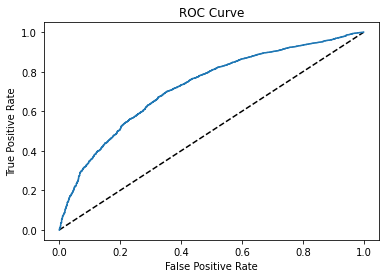

In [ ]:
from sklearn.metrics import roc_curve

#creamos el predict
stdreg_y_pred_prob = logreg.predict_proba(train_no_sev_bal)[:,1]


fpr, tpr, thresholds = roc_curve(train_sev_bal, stdreg_y_pred_prob)

# Tras crear la curva ROC, la ploteamos
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

[[  217   140]
 [ 5951 13692]]


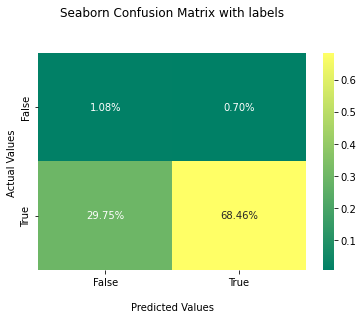

In [ ]:
from sklearn.metrics import confusion_matrix
#generamos la matrix de confusion y agregamos etiquetas en los label para facilitar la lectura

cf_matrix = confusion_matrix(test_sev, sev_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
fmt='.2%', cmap='summer')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=55)
knn.fit(train_no_sev_bal, train_sev_bal)
knn_pred = knn.predict(test_no_sev)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:498: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
print("Accuracy:",metrics.accuracy_score(test_sev, knn_pred))
print("Precision:",metrics.precision_score(test_sev, knn_pred))
print("Recall:",metrics.recall_score(test_sev, knn_pred))
print("F-Score:",metrics.f1_score(test_sev, knn_pred))
print("AUC:",metrics.roc_auc_score(test_sev, knn_pred))

Accuracy: 0.7247
Precision: 0.9894744131292846
Recall: 0.7274347095657486
F-Score: 0.8384579274733013
AUC: 0.6508322007212496


In [ ]:
KNN_metrics = ['KNN',
                   metrics.accuracy_score(test_sev, knn_pred),
                   metrics.precision_score(test_sev, knn_pred),
                   metrics.recall_score(test_sev, knn_pred),
                   metrics.f1_score(test_sev, knn_pred),
                   metrics.roc_auc_score(test_sev, knn_pred)]

In [ ]:
mejor_metrics.loc[1] = KNN_metrics
mejor_metrics

,Tipo_Algoritmo,Accuracy,Precision,Recall,F-Score,AUC
0,Reg_log,0.69545,0.989879,0.697042,0.818043,0.652443
1,KNN,0.72470,0.989474,0.727435,0.838458,0.650832


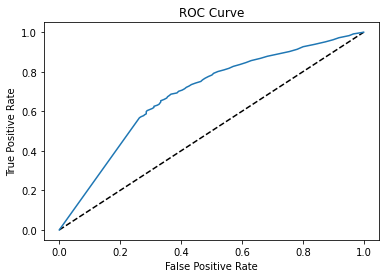

In [ ]:
knn_y_pred_prob = knn.predict_proba(test_no_sev)[:,1]

fpr, tpr, thresholds = roc_curve(test_sev, knn_y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

[[  205   152]
 [ 5354 14289]]


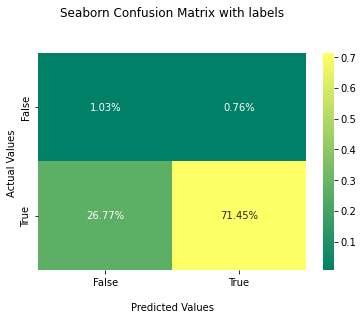

In [ ]:
cf_matrix = confusion_matrix(test_sev, knn_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
fmt='.2%', cmap='summer')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

# Árbol de decisión simple 

best mean cross-validation score: 0.841
best parameters: {'max_depth': 9}


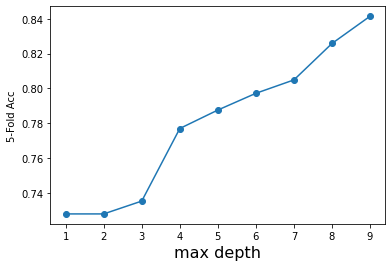

In [ ]:
maxDepth = range(1,10) 
param_grid = {'max_depth': maxDepth } 

grid = GridSearchCV(DecisionTreeClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(train_no_sev_bal, train_sev_bal)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

In [ ]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo).fit(train_no_sev_bal,train_sev_bal)

print("Train: ",treeModel.score(train_no_sev_bal,train_sev_bal))
print("Test: ",treeModel.score(test_no_sev,test_sev))

Train:  0.8433097696180644
Test:  0.8729


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini', max_depth=9, random_state=1)

classifier.fit(train_no_sev_bal, train_sev_bal)

tree_y_pred = classifier.predict(test_no_sev)

[Text(0.6802961579509071, 0.95, 'X[18] <= 2.5\ngini = 0.5\nsamples = 157304\nvalue = [78652, 78652]'),
 Text(0.39034151547491996, 0.85, 'X[10] <= 2.5\ngini = 0.456\nsamples = 121439\nvalue = [42800, 78639]'),
 Text(0.15114727854855922, 0.75, 'X[4] <= 1.5\ngini = 0.258\nsamples = 27461\nvalue = [4182, 23279]'),
 Text(0.06776947705442903, 0.65, 'X[20] <= 2.5\ngini = 0.458\nsamples = 3885\nvalue = [1381, 2504]'),
 Text(0.06350053361792957, 0.55, 'X[5] <= 34.5\ngini = 0.498\nsamples = 2925\nvalue = [1381, 1544]'),
 Text(0.04589114194236926, 0.45, 'X[0] <= 2013.5\ngini = 0.492\nsamples = 2642\nvalue = [1150, 1492]'),
 Text(0.032017075773746, 0.35, 'X[0] <= 2005.5\ngini = 0.473\nsamples = 2252\nvalue = [863, 1389]'),
 Text(0.017075773745997867, 0.25, 'X[0] <= 2004.5\ngini = 0.5\nsamples = 1251\nvalue = [622, 629]'),
 Text(0.008537886872998933, 0.15, 'X[19] <= 1.5\ngini = 0.434\nsamples = 788\nvalue = [251, 537]'),
 Text(0.004268943436499467, 0.05, 'gini = 0.334\nsamples = 165\nvalue = [130, 

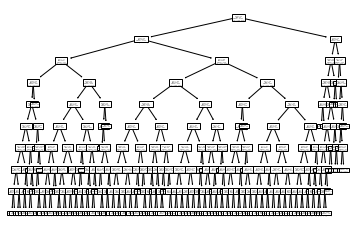

In [ ]:
from sklearn import tree
tree.plot_tree (treeModel)

In [ ]:
print("Accuracy:",metrics.accuracy_score(test_sev, tree_y_pred))
print("Precision:",metrics.precision_score(test_sev, tree_y_pred))
print("Recall:",metrics.recall_score(test_sev, tree_y_pred))
print("F-Score:",metrics.f1_score(test_sev, tree_y_pred))
print("AUC:",metrics.roc_auc_score(test_sev, tree_y_pred))

Accuracy: 0.8728
Precision: 0.9923409156348978
Recall: 0.8772590744794583
F-Score: 0.9312581063553826
AUC: 0.7523550274358075


In [ ]:
Tree_metrics = ['simple_tree',
                   metrics.accuracy_score(test_sev, tree_y_pred),
                   metrics.precision_score(test_sev, tree_y_pred),
                   metrics.recall_score(test_sev, tree_y_pred),
                   metrics.f1_score(test_sev, tree_y_pred),
                   metrics.roc_auc_score(test_sev, tree_y_pred)]

In [ ]:
mejor_metrics.loc[2] = Tree_metrics
mejor_metrics

,Tipo_Algoritmo,Accuracy,Precision,Recall,F-Score,AUC
0,Reg_log,0.69545,0.989879,0.697042,0.818043,0.652443
1,KNN,0.72470,0.989474,0.727435,0.838458,0.650832
2,simple_tree,0.87280,0.992341,0.877259,0.931258,0.752355


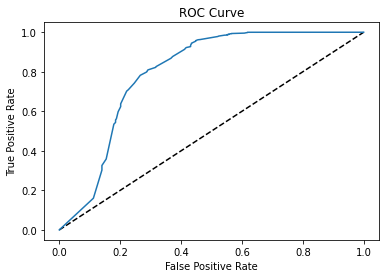

In [ ]:
decision_tree_y_pred_prob = classifier.predict_proba(test_no_sev)[:,1]

fpr, tpr, thresholds = roc_curve(test_sev, decision_tree_y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

[[  224   133]
 [ 2411 17232]]


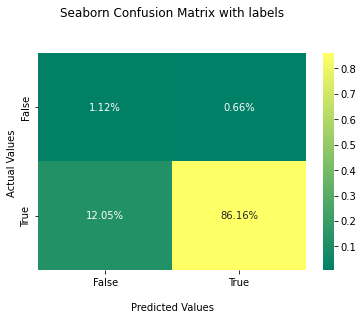

In [ ]:
cf_matrix = confusion_matrix(test_sev, tree_y_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
fmt='.2%', cmap='summer')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

# Bagging Classifier

In [ ]:
bgclassifier = BaggingClassifier()

bgclassifier.fit(train_no_sev_bal, train_sev_bal)
bg_status_pred = bgclassifier.predict(test_no_sev)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
print("Accuracy:",metrics.accuracy_score(test_sev, bg_status_pred))
print("Precision:",metrics.precision_score(test_sev, bg_status_pred))
print("Recall:",metrics.recall_score(test_sev, bg_status_pred))
print("F-Score:",metrics.f1_score(test_sev, bg_status_pred))
print("AUC:",metrics.roc_auc_score(test_sev, bg_status_pred))

Accuracy: 0.9846
Precision: 0.9892211932594505
Recall: 0.9951636715369343
F-Score: 0.9921835346665313
AUC: 0.6992625080373747


In [ ]:
Bagging_metrics = ['Bagging',
                   metrics.accuracy_score(test_sev, bg_status_pred),
                   metrics.precision_score(test_sev, bg_status_pred),
                   metrics.recall_score(test_sev, bg_status_pred),
                   metrics.f1_score(test_sev, bg_status_pred),
                   metrics.roc_auc_score(test_sev, bg_status_pred)]

In [ ]:
mejor_metrics.loc[3] = Bagging_metrics
mejor_metrics

,Tipo_Algoritmo,Accuracy,Precision,Recall,F-Score,AUC
0,Reg_log,0.69545,0.989879,0.697042,0.818043,0.652443
1,KNN,0.72470,0.989474,0.727435,0.838458,0.650832
2,simple_tree,0.87280,0.992341,0.877259,0.931258,0.752355
3,Bagging,0.98460,0.989221,0.995164,0.992184,0.699263


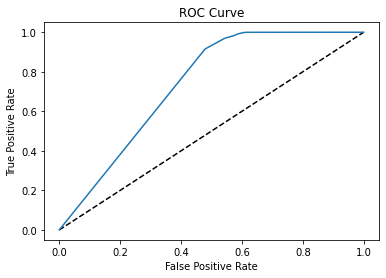

In [ ]:
bagging_y_pred_prob = bgclassifier.predict_proba(test_no_sev)[:,1]

fpr, tpr, thresholds = roc_curve(test_sev, bagging_y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

[[  144   213]
 [   95 19548]]


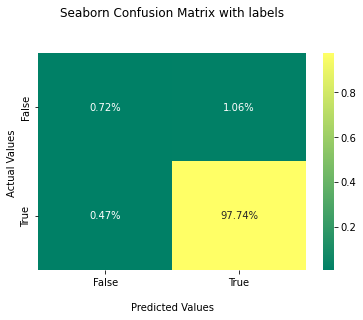

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(test_sev, bg_status_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
fmt='.2%', cmap='summer')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

# Radom Forest

In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150, 170, 190, 200],
                 'max_features': [5, 7],
                 'max_depth'   : [None, 3, 10],
                 'criterion'   : ['gini']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(train_no_sev_bal, train_sev_bal)
    
    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados.head(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 170} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 190} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 200} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 170} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 190} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 200} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 170} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 190} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 200} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'n_estimators': 170} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'n_estimators': 190} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'n_estimators': 200} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 170} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 190} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 200} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 170} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 190} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 200} ✓


,oob_accuracy,criterion,max_depth,max_features,n_estimators
2,0.999879,gini,NaN,5,190
0,0.999873,gini,NaN,5,150
1,0.999873,gini,NaN,5,170
3,0.999873,gini,NaN,5,200


In [ ]:
randomforest_classifier = RandomForestClassifier(max_depth=None, n_estimators=200, max_features=5, criterion='gini' )
randomforest_classifier.fit(train_no_sev_bal, train_sev_bal)

rand_forest_y_pred = randomforest_classifier.predict(test_no_sev)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
print("Accuracy:",metrics.accuracy_score(test_sev, rand_forest_y_pred))
print("Precision:",metrics.precision_score(test_sev, rand_forest_y_pred))
print("Recall:",metrics.recall_score(test_sev, rand_forest_y_pred))
print("F-Score:",metrics.f1_score(test_sev, rand_forest_y_pred))
print("AUC:",metrics.roc_auc_score(test_sev, rand_forest_y_pred))

Accuracy: 0.9888
Precision: 0.9890203978846638
Recall: 0.999694547676017
F-Score: 0.9943288267760393
AUC: 0.6945251449864678


In [ ]:
RandomF_metrics = ['RF',
                   metrics.accuracy_score(test_sev, rand_forest_y_pred),
                   metrics.precision_score(test_sev, rand_forest_y_pred),
                   metrics.recall_score(test_sev, rand_forest_y_pred),
                   metrics.f1_score(test_sev, rand_forest_y_pred),
                   metrics.roc_auc_score(test_sev, rand_forest_y_pred)]

In [ ]:
mejor_metrics.loc[4] = RandomF_metrics
mejor_metrics

,Tipo_Algoritmo,Accuracy,Precision,Recall,F-Score,AUC
0,Reg_log,0.69545,0.989879,0.697042,0.818043,0.652443
1,KNN,0.72470,0.989474,0.727435,0.838458,0.650832
2,simple_tree,0.87280,0.992341,0.877259,0.931258,0.752355
3,Bagging,0.98460,0.989221,0.995164,0.992184,0.699263
4,RF,0.98880,0.989020,0.999695,0.994329,0.694525


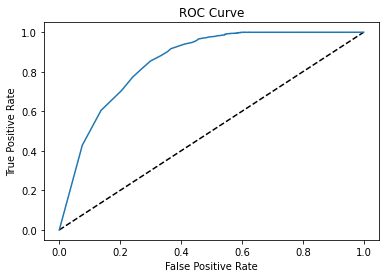

In [ ]:
RandomF_y_pred_prob = randomforest_classifier.predict_proba(test_no_sev)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_sev, RandomF_y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

[[  139   218]
 [    6 19637]]


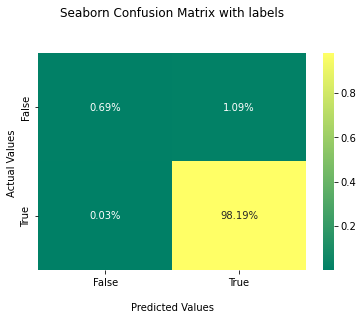

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(test_sev, rand_forest_y_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
fmt='.2%', cmap='summer')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

# Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
grad_boost = GradientBoostingRegressor(
            n_estimators = 13,
            loss         = 'ls',
            max_features = 'auto',
            random_state = 123
         )

grad_boost.fit(train_no_sev_bal, train_sev_bal)
   
grad_boost_y_pred = grad_boost.predict(test_no_sev)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning:

The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.



In [ ]:
print("Accuracy:",metrics.accuracy_score(test_sev, grad_boost_y_pred))
print("Precision:",metrics.precision_score(test_sev, grad_boost_y_pred))
print("Recall:",metrics.recall_score(test_sev, grad_boost_y_pred))
print("F-Score:",metrics.f1_score(test_sev, grad_boost_y_pred))
print("AUC:",metrics.roc_auc_score(test_sev, grad_boost_y_pred))

ValueError: ignored

In [ ]:
# Compute predicted probabilities: y_pred_prob
GB_y_pred_prob = grad_boost.predict_proba(train_no_loan_bal)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(df_train_loan_status_bal, GB_y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

AttributeError: ignored

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(df_test_loan_status, grad_boost_y_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
fmt='.2%', cmap='summer')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

NameError: ignored

# 5 b) Modelo para analizar si va a necesitar tratamiento medico o no. 


In [ ]:
Data_nomort['P_ISEV'] = Data_nomort['P_ISEV'].map({2: 1, 1: 0}).astype(int)



In [ ]:
from sklearn.model_selection import train_test_split

train_data1, test_data1 = train_test_split(Data_nomort, test_size=0.2)


In [ ]:
train_no_inj =train_data1[['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR', 'P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'C_SEV', 'P_SAFE',
       'P_USER']]
train_inj = train_data1[['P_ISEV']]
test_no_inj =test_data1[['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR', 'P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'C_SEV', 'P_SAFE',
       'P_USER']]
test_inj = test_data1[['P_ISEV']]

In [ ]:
# Grid de hiperparámetros evaluados
#Como hemos visto antes el mejor modelo de todos basandonos en las metricas es el random forest, por ello, hemos utilizado este algoritmo para estimar si se necesitará o no intervencion medica. 
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150, 170, 190, 200],
                 'max_features': [5, 7],
                 'max_depth'   : [None, 3, 10],
                 'criterion'   : ['gini']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(train_no_inj, train_inj)
    
    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados.head(4)

# Para averiguar cual es la mejor medida obtenemos este dataframe:

In [ ]:
mejor_metrics

# 7. Plus: complementar con datos abiertos de clima (aunque Canadá es muy grande) y de otra tipología, ¿hay algún tipo de relación con temperaturas medias, precipitación media del día/mes, nieve...? ¿a más días festivos o de vacaciones, más accidentes? etc. 

In [ ]:
#Primeramente creamos un dataframe solo con la variable tiempo y con un group by para visualizar los datos
Data_we = Data_na_cont.groupby(['C_WTHR']).size().reset_index(name='Conteo de accidentes por clima')
Data_we = Data_we.sort_values(['Conteo de accidentes por clima'], ascending=[False])
Data_we


,C_WTHR,Conteo de accidentes por clima
0,1,4152251
1,2,608839
2,3,606945
3,4,362060
5,6,83839
4,5,30808
6,7,15614


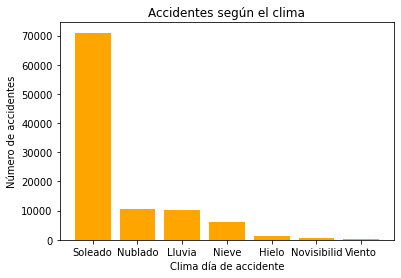

In [ ]:
eje_x = ['Soleado', 'Nublado', 'Lluvia', 'Nieve','Hielo','Novisibilid','Viento']
eje_y = [71000,10451,10335,6043,1376,533,262]
plt.bar(eje_x, eje_y,color="ORANGE")
plt.ylabel('Número de accidentes')
plt.xlabel('Clima día de accidente')
plt.title('Accidentes según el clima')
plt.show()

Como podemos observar en la gráfica de arriba los días en los que hace soleado(1) son con diferencia en los que más accidentes ocurren. Seguidos de los días soleados el segundo puesto en más accidentes son los días nublados(2) y por último los días lluviosos(3). Estos últimos datos nos indican que sorprendentemente, el clima con el que más accidentes ocurren es en días de sol.

In [ ]:
#Procedemos a realizar el mismo proceso para la variable C_MNTH. Con esto último, conseguiremos comprobar si en los meses de verano y navidad
#son los meses en los que más accidentes se producen. Los meses de julio agosto y diciembre son los meses en los que más vacaciones/días de
#fiesta se producen

Data_mnth = Data_na_cont.groupby(['C_MNTH']).size().reset_index(name='Conteo de accidentes por mes')
Data_mnth = Data_mnth.sort_values(['Conteo de accidentes por mes'], ascending=[False])
Data_mnth

,C_MNTH,Conteo de accidentes por mes
7,8,547045
6,7,537691
11,12,526133
5,6,520010
9,10,515910
8,9,512790
0,1,499828
10,11,499080
4,5,468235
1,2,423287


In [ ]:
Data_mnth['Conteo de accidentes por mes']

7     547045
6     537691
11    526133
5     520010
9     515910
8     512790
0     499828
10    499080
4     468235
1     423287
2     417814
3     392533
Name: Conteo de accidentes por mes, dtype: int64

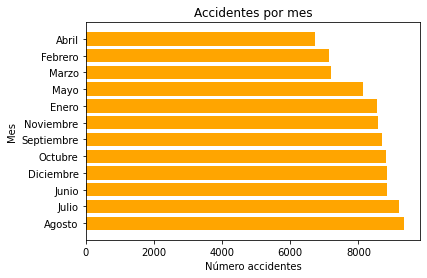

In [ ]:
eje_x = ['Agosto', 'Julio', 'Junio', 'Diciembre','Octubre','Septiembre','Noviembre','Enero','Mayo','Marzo','Febrero','Abril']
eje_y = [9348,9190,8842,8842,8814,8692,8562,8534,8137,7201,7123,6715]

plt.barh(eje_x, eje_y, color="orange")
plt.ylabel('Mes')
plt.xlabel('Número accidentes')
plt.title('Accidentes por mes')
plt.show()

Como podemos observar en la gráfica de arriba, los meses en los que más accidentes ocurren son los meses de Agosto, Julio, Junio, Diciembre y Octubre. Podemos afirmar que los meses en los que más días de vacaciones/fiestas existen, más accidentes ocurren. Esto último lo podemos relacionar con las operaciones de entrada/salida que provocan colisiones y son más frecuentes en estaciones vacacionales.